Data Ghattering into sigel Data frame

In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:

listOfFiles=os.listdir("./OECD_Data")
len(listOfFiles)

44

In [3]:
baseDir="./OECD_Data/"
listOfSize=list()
for file in listOfFiles:
    listOfSize.append(os.path.getsize(baseDir+file))
len(listOfSize)
fileVSsizeDf=pd.DataFrame({'File_name':listOfFiles,'File_size':listOfSize})

In [4]:
fileVSsizeDf

,File_name,File_size
0,CO2 emissions from transport in tonnes per one million units of current USD GDP.csv,6415
1,Density of road (km per one hundred sq. km).csv,5047
2,Hospitalised - rate per population.csv,10
3,Hospitalised.csv,10
4,Injured and seriously injured - rate per population.csv,10
...,...,...
39,Total railway enterprises - Number at 31.12.csv,1588
40,Total self-propelled vessels - Number at 31.12 (Units).csv,1243
41,Total Tracks - Length operated at 31.12 (km).csv,3001
42,Total transported - Tonnes (1000).csv,1937


In [5]:
totalSize=fileVSsizeDf['File_size'].sum()
print(f"{totalSize/1000}{' KB'}")

165.387 KB


<BarContainer object of 44 artists>

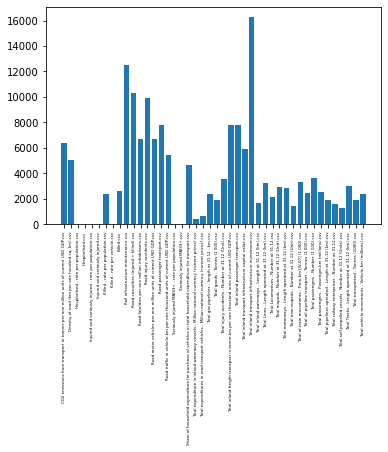

In [6]:
y=fileVSsizeDf['File_size']
x=fileVSsizeDf['File_name']

plt.xticks(fontsize=4,rotation=90)
plt.bar(x,y)

In [7]:
fileVSsizeDf.describe()

,File_size
count,44.000000
mean,3758.795455
std,3619.336227
min,10.000000
25%,1542.750000
50%,2572.500000
75%,5554.750000
max,16261.000000


In [8]:
smallFilesDf=fileVSsizeDf[fileVSsizeDf["File_size"]<=10]

In [33]:
smallFilesDf

,File_name,File_size
2,Hospitalised - rate per population.csv,10
3,Hospitalised.csv,10
4,Injured and seriously injured - rate per population.csv,10
5,Injured and seriously injured.csv,10
7,Killed - rate per vehicle.csv,10
16,Seriously injured MAIS3+ - rate per population.csv,10
17,Seriously injured MAIS3+.csv,10


In [42]:
def readCsvFile(dirName,FileName):
    title=FileName.strip('.csv')
    df=pd.read_csv(dirName+FileName)
    return title ,df

In [47]:
smallFileName,smallFile=readCsvFile(baseDir,smallFilesDf.iloc[0,0])

In [48]:
print(smallFileName)
smallFile

Hospitalised - rate per population


,Unnamed: 0,Country


Looks like those files are emty!!! let's get rid of them

In [13]:
fileVSsizeDf=fileVSsizeDf[fileVSsizeDf["File_size"]>10]

In [16]:
fileVSsizeDf.describe()

,File_size
count,37.000000
mean,4468.027027
std,3520.956913
min,405.000000
25%,2180.000000
50%,3001.000000
75%,6415.000000
max,16261.000000


In [23]:
fileVSsizeDf.reset_index(drop=True)

,File_name,File_size
0,CO2 emissions from transport in tonnes per one million units of current USD GDP.csv,6415
1,Density of road (km per one hundred sq. km).csv,5047
2,Killed - rate per population.csv,2340
3,Killed.csv,2637
4,Rail infrastructure maintenance.csv,12534
...,...,...
32,Total railway enterprises - Number at 31.12.csv,1588
33,Total self-propelled vessels - Number at 31.12 (Units).csv,1243
34,Total Tracks - Length operated at 31.12 (km).csv,3001
35,Total transported - Tonnes (1000).csv,1937


In [28]:
fileVSsizeDf.sort_values('File_size',ascending=False,inplace=True)

c:\Users\vova\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [29]:
fileVSsizeDf

,File_name,File_size
27,Total inland transport infrastructure investment.csv,16261
9,Rail infrastructure maintenance.csv,12534
10,Road casualties (injured + killed).csv,10303
12,Road injury accidents.csv,9949
25,Total inland passenger transport.csv,7829
...,...,...
39,Total railway enterprises - Number at 31.12.csv,1588
33,Total new mopeds - Number at 31.12 (Unit).csv,1407
40,Total self-propelled vessels - Number at 31.12 (Units).csv,1243
20,Total expenditures in road transport vehicles - Million national currency (current prices).csv,617


In [50]:
largestFileName,largestFile=readCsvFile(baseDir,fileVSsizeDf.iloc[0,0])

In [51]:
print(largestFileName)
largestFile

Total inland transport infrastructure investment


,Unnamed: 0,Country,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,0,Albania,110 421 157,109 000 161,70 095 912,61 524 588,93 169 404,70 617 602,176 588 443,253 972 744,...,211 073 671,181 381 938,234 855 224,193 433 093,179 805 597,89 140 344,159 039 587,169 584 097,176 958 861,193 777 446
1,1,Armenia,..,..,..,..,..,..,..,..,...,56 912 144,50 385 177,34 859 273,78 787 965,90 106 584,96 063 309,..,..,..,..
2,2,Australia,4 111 727 074,3 628 905 871,4 092 838 444,4 833 286 164,6 297 490 327,8 249 461 118,8 224 156 612,9 988 625 292,...,18 966 838 074,22 503 132 804,17 709 946 636,14 759 164 861,13 253 348 214,14 427 216 902,17 501 662 020,19 743 498 564,..,..
3,3,Austria,1 674 000 000,1 711 000 000,(B) 1 724 000 000,1 798 000 000,2 067 000 000,2 024 000 000,2 298 000 000,2 379 000 000,...,2 448 000 000,2 018 000 000,2 022 000 000,2 030 000 000,2 006 000 000,1 969 000 000,2 070 000 000,2 148 000 000,2 303 500 000,2 553 700 000
4,4,Azerbaijan,35 096 212,56 354 916,71 817 193,38 714 324,55 655 590,101 876 220,271 981 452,377 615 241,...,1 564 149 227,1 482 139 333,1 917 466 411,1 415 139 595,874 966 957,499 291 584,558 101 220,698 496 465,844 848 421,757 653 850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,44,Sweden,1 502 030 571,1 564 225 288,1 961 786 221,2 051 422 559,(B) 2 536 701 370,2 599 023 717,2 657 808 566,2 868 494 720,...,3 500 044 309,3 782 225 183,3 402 994 047,3 345 524 299,(B) 3 491 464 001,3 587 992 353,3 899 397 109,3 921 329 472,4 194 961 603,5 022 406 346
45,45,Switzerland,4 195 929 897,4 409 427 966,4 863 004 362,4 739 264 812,4 846 188 718,(B) 4 957 695 537,5 061 343 843,5 003 348 146,...,7 232 576 985,7 344 229 652,7 397 026 566,7 197 431 253,8 419 226 449,7 804 189 604,7 050 908 988,6 894 743 240,7 735 625 134,..
46,46,Turkey,1 074 697 638,1 457 640 653,1 048 450 077,1 116 778 771,1 534 796 460,2 063 282 812,2 776 133 161,2 765 846 887,...,6 730 791 064,6 310 358 609,8 480 504 328,8 024 443 856,10 137 833 559,9 047 850 794,7 871 354 394,..,..,..
47,47,United Kingdom,10 438 063 987,11 805 756 553,12 996 183 206,12 689 695 043,10 400 825 228,11 387 629 770,(B) 14 279 847 463,13 928 746 035,...,13 097 682 646,14 323 368 265,14 456 300 047,18 152 263 145,(B) 23 733 545 455,22 072 500 916,22 246 139 710,22 216 153 933,22 940 922 147,..


In [62]:
DfNameList=list()
DfList=list()
for file in fileVSsizeDf["File_name"]:
    f_name,f_df=readCsvFile(baseDir,file)
    DfNameList.append(f_name)
    DfList.append(f_df)
    

In [94]:
dataframesDf=pd.DataFrame({"DataFrame_name":DfNameList,"DataFrame":DfList})


In [107]:
max=0
for i in dataframesDf.index:
    count=len(dataframesDf.iloc[i,1])
    if(count>max):
        max=count
        title=dataframesDf.iloc[i,0]
print(max)

58


In [117]:
title

'Road casualties (injured + killed)'

In [134]:
maxCountryDf=dataframesDf.loc[dataframesDf["DataFrame_name"]==title]
maxCountryDf=maxCountryDf.iloc[0,1]

In [136]:
maxCountryList=maxCountryDf["Country"]

In [144]:
maxCountryDf.columns

Index(['Unnamed: 0', 'Country', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

In [152]:
max_year=0
min_year=2030
for i in dataframesDf.index:
    df=dataframesDf.iloc[i,1]
    min_y=int(df.columns[2])
    max_y=int(df.columns[-1])
    if(min_y<min_year):
        min_year=min_y
    elif(max_y>max_year):
        max_year=max_y

In [153]:
print(f"min year is: {min_year}\nmax year is: {max_year}")

min year is: 2000
max year is: 2020
